# Song Popularity Prediction

## Introduction
Songs and music have become an integral part of our lives as they are great stressbusters, brain stimulators and provide fun and entertainment to both the young and old alike. Around <b>7.11 billion</b> listen to music, out of which, an average person listens to <b>961 hours and 10 minutes</b> of music <b>per year</b>. Mobile and Web applications such as <b>Spotify and Billboard Hot 100</b> use charts to show the top songs of the week or month. They also tack the listening habits of the users to recommend songs that they or users with listening habits similar to them would like. Although these recommendations are filtered by region, genre, and more other categories, they are still missing a lot of the variables. Variables such as <b>age group and language</b> (as most of the top song are in the English language) are commonly overlooked. Through this project, I will be able to consider some more variables that could have an impact on the popularity.


## Aim

The main objective of this Machine Learning model is to predict song popularity using different factors such as liveliness and danceability to name a few. Predicting these factors can have a significant impact on both songwriters and listeners. It would help songwriters to analyse and create music that would help them to gain popularity by attracting more listeners. Similarly, this would also help listeners to find and explore songs that they would want to listen to more easily.

## Importing the libraries

In [1]:
#library for arrays and linear algebra
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

#library for dataframe manipulation
import pandas as pd

## Importing the dataset and Data Exploration

In [2]:
#The song dataset is taken from Kaggle, "Song Popularity Dataset", 2022.[Online]
#Available: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset
#License: CC0: Public Domain

song_dataset = pd.read_csv('song_data.csv')
song_dataset.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [3]:
#checking the data types of all the columns
song_dataset.info()
print(song_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
song_name           0
song_pop

The dataset contains 15 columns and 18835 rows with no null values. 

In [4]:
#To check the number of unique records from each feature 
#and sorting them in ascending order

#referenced from: Rajput-Ji, "Get unique values from a column in Pandas DataFrame", 2018.[Online]
#Available: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

song_dataset.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

It can also be observed from above data that since there are only 13070 unique song names out of 18835 rows, there must be duplicate songs in the dataset. I will check for these duplicates and remove them in the next section so that my Machine Learning model does not consider these duplicate values while predicting.

In [5]:
#Getting number of values that are equal to 0
num_zeros = (song_dataset == 0).sum()
num_zeros

song_name              0
song_popularity      272
song_duration_ms       0
acousticness           0
danceability           2
energy                 0
instrumentalness    7150
key                 2182
liveness               0
loudness               0
audio_mode          7004
speechiness            2
tempo                  2
time_signature         3
audio_valence          2
dtype: int64

It is possible for a song to have a popularity of 0. However, other features such as instrumentalness and key having a value of 0 can affect the model prediction performance. Hence, I will replace the 0 values with the mean of the values in that column. I will do this in the Data Manipulation section before splitting the data into the training set and test set.

## Exploratory Data Analysis

In [6]:
#The song_name column is not required as a feature for predicting song popularity.
#Hence I will delete the song_name column.
song_dataset2 = song_dataset.drop(['song_name'], axis = 1)

#Checking for duplicate values 
#referenced from: Pandas, "pandas.DataFrame.duplicated", 2022.[Online]
#Available: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicates = song_dataset2[song_dataset2.duplicated()] 
#duplicates       //3910 duplicate rows have been identified

#Dropping the duplicate values
#referenced from: Pandas, "pandas.DataFrame.drop_duplicates", 2022.[Online]
#Available: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
song_dataset3 = song_dataset2.drop_duplicates()   #using the default parameters subset=None, *, 
                                                                 #keep='first', inplace=False, ignore_index=False)                       

song_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14924 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14924 non-null  int64  
 1   song_duration_ms  14924 non-null  int64  
 2   acousticness      14924 non-null  float64
 3   danceability      14924 non-null  float64
 4   energy            14924 non-null  float64
 5   instrumentalness  14924 non-null  float64
 6   key               14924 non-null  int64  
 7   liveness          14924 non-null  float64
 8   loudness          14924 non-null  float64
 9   audio_mode        14924 non-null  int64  
 10  speechiness       14924 non-null  float64
 11  tempo             14924 non-null  float64
 12  time_signature    14924 non-null  int64  
 13  audio_valence     14924 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.7 MB


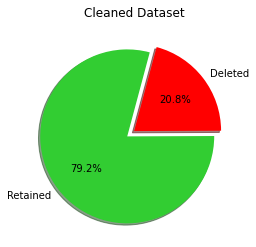

In [7]:
#Visualisation of cleaned dataset.

#referenced from: Matplotlib, "Basic pie chart", 2022.[Online]
#Available: https:https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

deleted_rows = song_dataset2.shape[0] - song_dataset3.shape[0]
my_labels = ['Retained', 'Deleted']
my_colors = ('limegreen', 'red')
explosion = [0.1, 0]
plt.title("Cleaned Dataset")
plt.pie([song_dataset3.shape[0],
         deleted_rows], 
         labels=my_labels, 
         colors = my_colors,
         explode = explosion,
         shadow = True,
         autopct='%1.1f%%',
         startangle = 75)
plt.show()


After removing 3910 duplicate records, 14924 unique records are remaining. It can also be observed that all features are numerical. Hence, there is no need to do any encoding to work on these features.

In [8]:
#Getting the features of the 10 most popular songs 
song_dataset3.nlargest(10,['song_popularity'])

song_popularity  song_duration_ms  acousticness  danceability  energy  \
4299              100            214289       0.19100         0.687   0.792   
1229               99            127946       0.01140         0.901   0.522   
61                 98            212500       0.15300         0.841   0.798   
4302               98            173799       0.55500         0.560   0.680   
4329               98            213309       0.01190         0.781   0.768   
7584               98            217925       0.05890         0.835   0.626   
1230               97            196400       0.01750         0.669   0.574   
1250               97            312820       0.00513         0.834   0.730   
7576               97            184560       0.17600         0.694   0.770   
7581               97            239835       0.34900         0.511   0.566   

      instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
4299          0.000000    5    0.1670    -2.749           1       0.0452   
1229          0.000000    2    0.2590    -8.304           1       0.3300   
61            0.000003    1    0.0618    -4.206           0       0.2290   
4302          0.000000    6    0.1160    -7.648           0       0.3210   
4329          0.000005   11    0.3250    -5.991           1       0.0394   
7584          0.000060    1    0.3960    -5.833           1       0.1250   
1230          0.002940    4    0.1460    -6.442           0       0.0286   
1250          0.000000    8    0.1240    -3.714           1       0.2220   
7576          0.000011    6    0.1180    -5.335           1       0.1490   
7581          0.000000    6    0.3400    -7.230           0       0.2000   

        tempo  time_signature  audio_valence  
4299  100.015               4          0.671  
1229  104.053               4          0.329  
61     95.948               4          0.591  
4302   89.391               4          0.319  
4329  123.070               4          0.486  
7584   91.030               4          0.350  
1230  120.013               4          0.273  
1250  155.008               4          0.446  
7576  125.905               4          0.163  
7581   83.903               4          0.218

In [9]:
#Getting the features of the 10 least popular songs
song_dataset3.nsmallest(10,['song_popularity'])

song_popularity  song_duration_ms  acousticness  danceability  energy  \
1078                0            199087       0.10500         0.632   0.646   
1233                0            196333       0.00151         0.753   0.616   
1758                0            199801       0.15400         0.726   0.751   
1777                0            291718       0.70000         0.418   0.334   
1791                0            168824       0.14700         0.337   0.791   
1792                0            260315       0.92400         0.294   0.158   
3077                0            222213       0.76800         0.750   0.470   
3435                0            194632       0.05200         0.843   0.643   
3752                0            156480       0.86900         0.589   0.604   
3756                0            266373       0.54900         0.626   0.447   

      instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
1078          0.000000    2    0.0454    -7.200           1       0.0519   
1233          0.000007    2    0.2910    -7.340           1       0.1650   
1758          0.000000    1    0.1170    -6.758           1       0.1740   
1777          0.000000   10    0.2900    -7.380           0       0.0318   
1791          0.952000    0    0.0970    -7.826           0       0.0642   
1792          0.096400    8    0.1090   -15.491           0       0.0325   
3077          0.532000    8    0.1110    -4.381           1       0.2970   
3435          0.000000   11    0.0973    -8.420           1       0.2170   
3752          0.000002    4    0.6840   -18.562           0       0.9410   
3756          0.000000    6    0.3520    -8.151           1       0.0554   

        tempo  time_signature  audio_valence  
1078  137.933               4         0.7770  
1233  156.830               4         0.2870  
1758  127.034               4         0.8590  
1777   76.075               4         0.2290  
1791  173.899               3         0.2280  
1792   99.750               4         0.0869  
3077   84.897               4         0.6000  
3435  150.033               4         0.8510  
3752  111.968               4         0.1970  
3756   93.908               4         0.6940

To understand what how the songs got a high or low popularity, the relationships and correlation of the features need to be understood.

<h1><center>Data spread of Individual Features</center></h1>

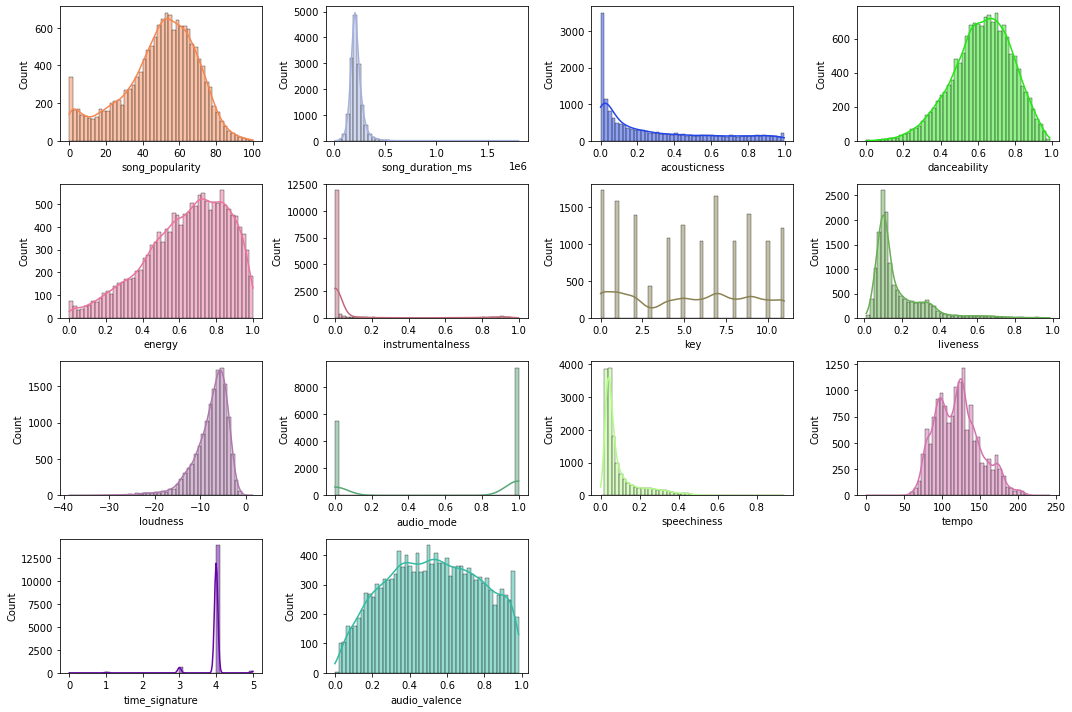

In [10]:
#visualization of data spread in individual features.
#Histplot referenced from: Roy G Kr, "Seaborn histplot (Visualize data with histograms)", 2022.[Online]
#Available: https://likegeeks.com/seaborn-histplot/
#Subplot referenced from: Bruno T, "Subplotting with matplotlib and seaborn", 2020.[Online]
#Available: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

plt.figure(figsize=(15,10))
display(Markdown(f"<h1><center>Data spread of Individual Features</center></h1>"))
for i in range(len(song_dataset3.columns)):
    plt.subplot(4,4, i+1)
    sns.histplot(song_dataset3[song_dataset3.columns[i]], 
                 bins=50, 
                 kde=True, 
                 color=list(np.random.randint([255,255,255])/255))    #To create a color with random RGB values
plt.tight_layout()
plt.show()

It can be observed that instrumentalness, time_signature and audio_mode have majority of their values almost equal to 0. We can further understand the relationships between features through a pair plot, which I will carry out in the next step.

<h1><center>Relationship b/w all features</center></h1>

## acousticness

### acousticness vs audio_mode, audio_valence, danceability, energy, instrumentalness

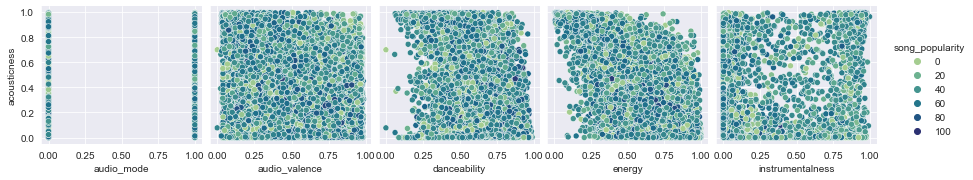

### acousticness vs key, liveness, loudness, song_duration_ms, speechiness

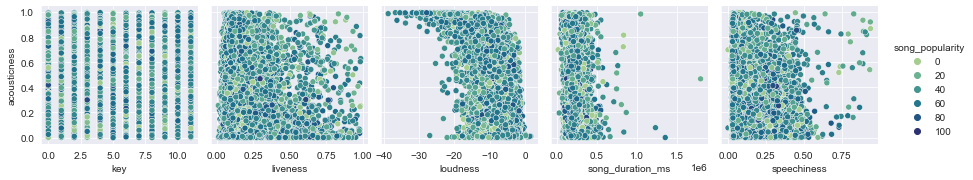

### acousticness vs tempo, time_signature

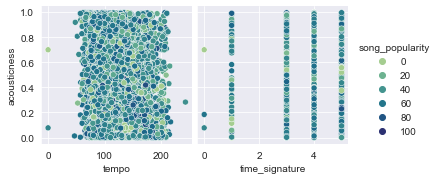

## audio_mode

### audio_mode vs acousticness, audio_valence, danceability, energy, instrumentalness

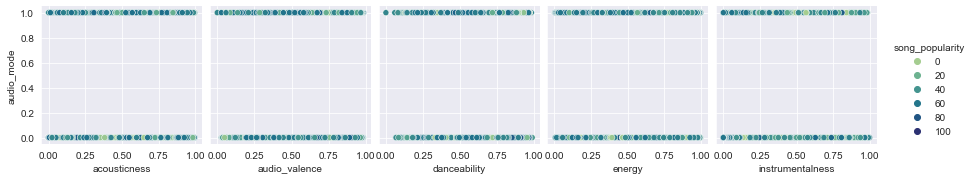

### audio_mode vs key, liveness, loudness, song_duration_ms, speechiness

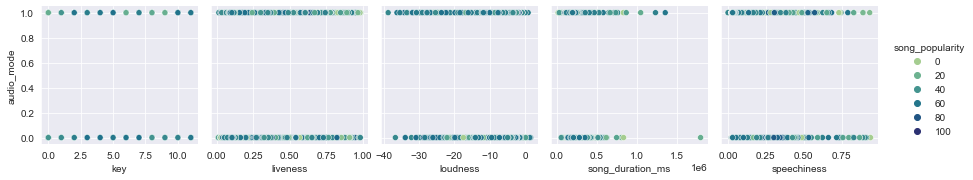

### audio_mode vs tempo, time_signature

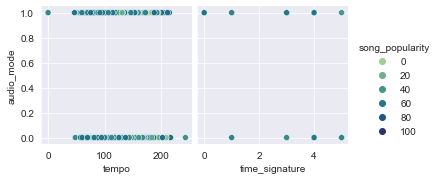

## audio_valence

### audio_valence vs acousticness, audio_mode, danceability, energy, instrumentalness

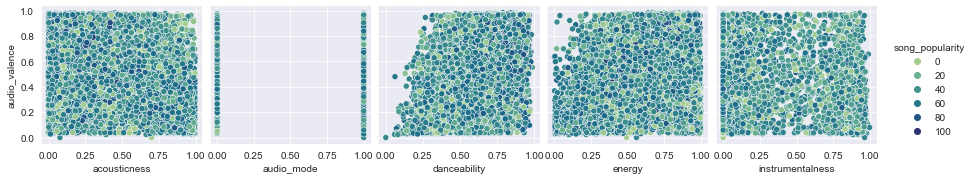

### audio_valence vs key, liveness, loudness, song_duration_ms, speechiness

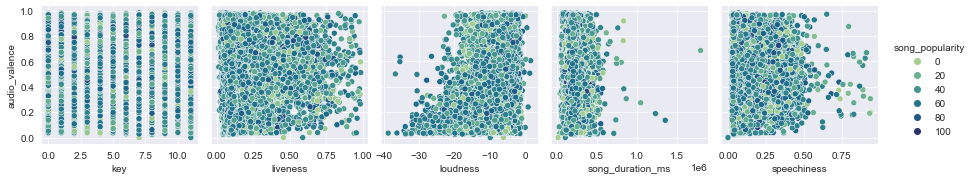

### audio_valence vs tempo, time_signature

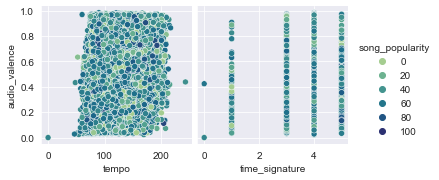

## danceability

### danceability vs acousticness, audio_mode, audio_valence, energy, instrumentalness

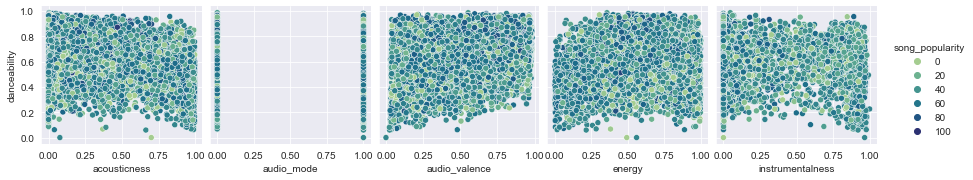

### danceability vs key, liveness, loudness, song_duration_ms, speechiness

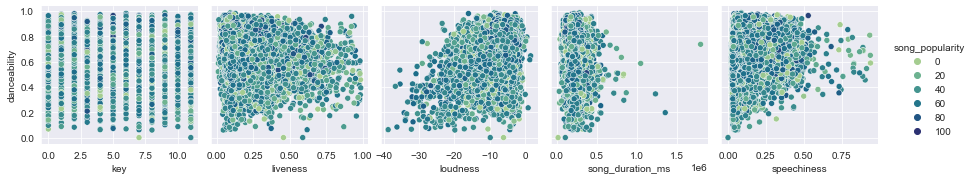

### danceability vs tempo, time_signature

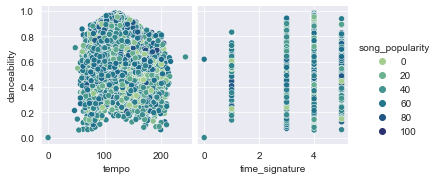

## energy

### energy vs acousticness, audio_mode, audio_valence, danceability, instrumentalness

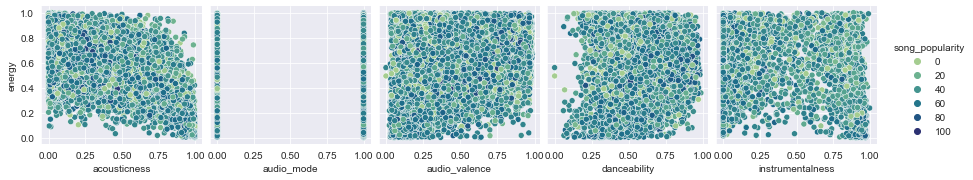

### energy vs key, liveness, loudness, song_duration_ms, speechiness

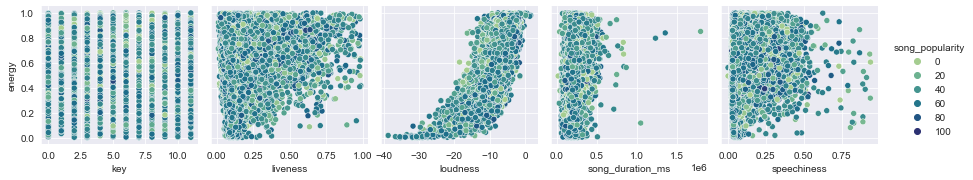

### energy vs tempo, time_signature

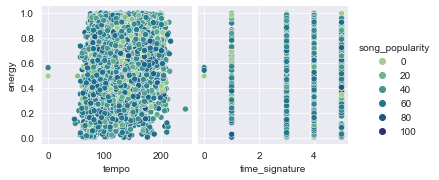

## instrumentalness

### instrumentalness vs acousticness, audio_mode, audio_valence, danceability, energy

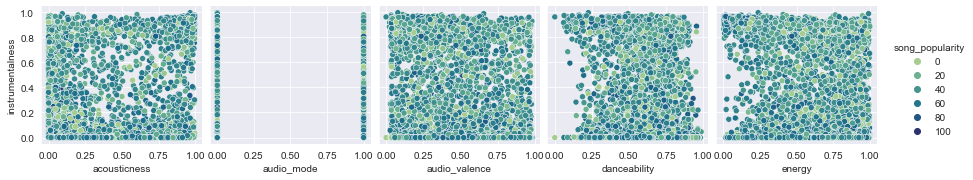

### instrumentalness vs key, liveness, loudness, song_duration_ms, speechiness

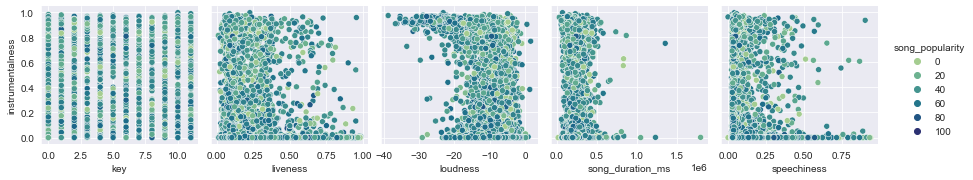

### instrumentalness vs tempo, time_signature

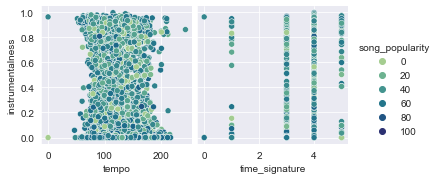

## key

### key vs acousticness, audio_mode, audio_valence, danceability, energy

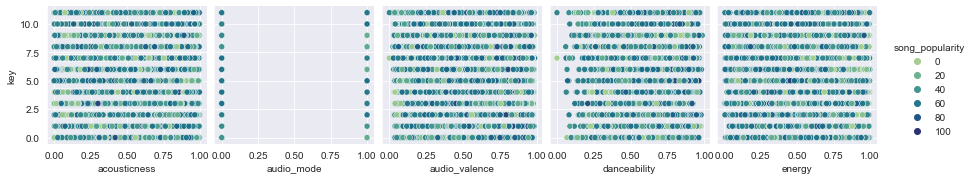

### key vs instrumentalness, liveness, loudness, song_duration_ms, speechiness

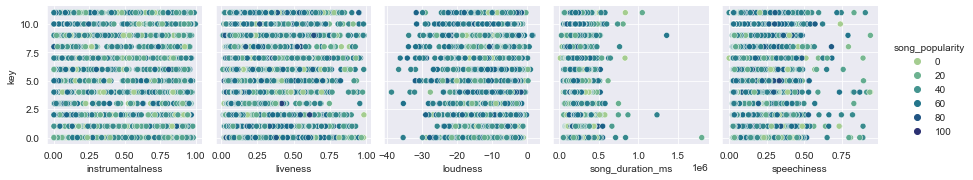

### key vs tempo, time_signature

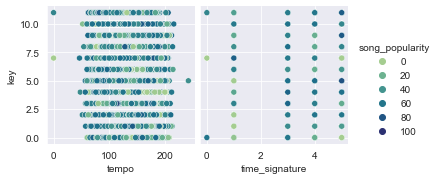

## liveness

### liveness vs acousticness, audio_mode, audio_valence, danceability, energy

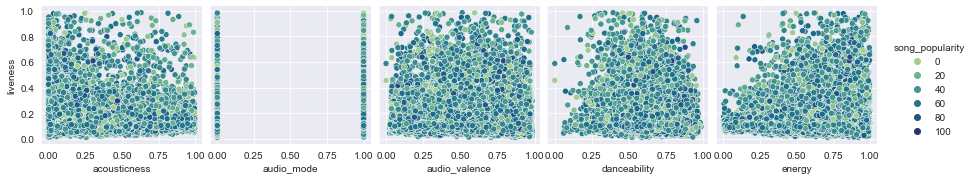

### liveness vs instrumentalness, key, loudness, song_duration_ms, speechiness

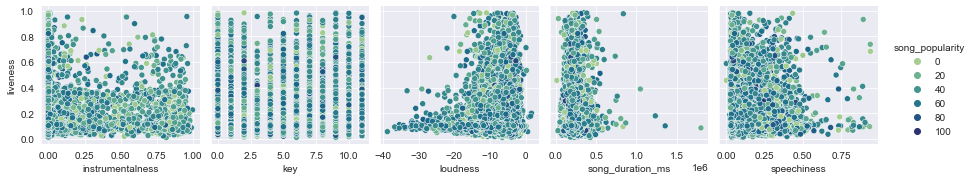

### liveness vs tempo, time_signature

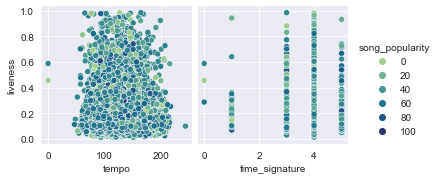

## loudness

### loudness vs acousticness, audio_mode, audio_valence, danceability, energy

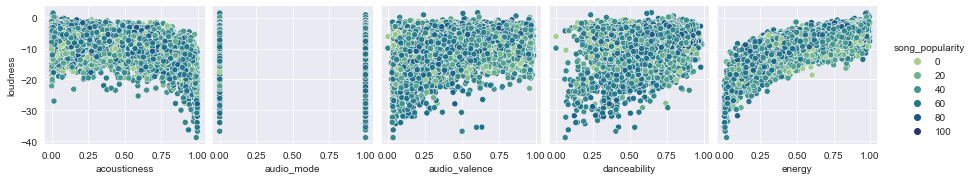

### loudness vs instrumentalness, key, liveness, song_duration_ms, speechiness

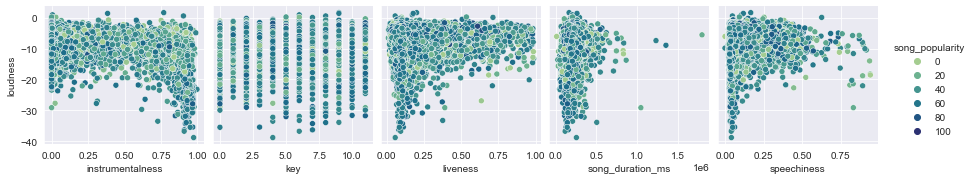

### loudness vs tempo, time_signature

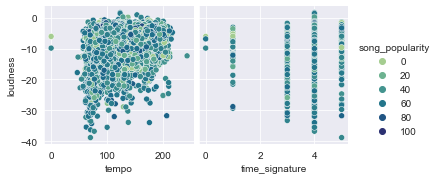

## song_duration_ms

### song_duration_ms vs acousticness, audio_mode, audio_valence, danceability, energy

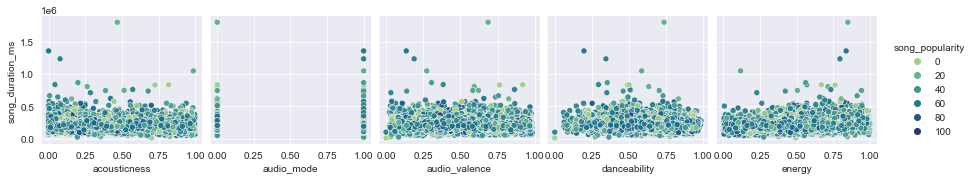

### song_duration_ms vs instrumentalness, key, liveness, loudness, speechiness

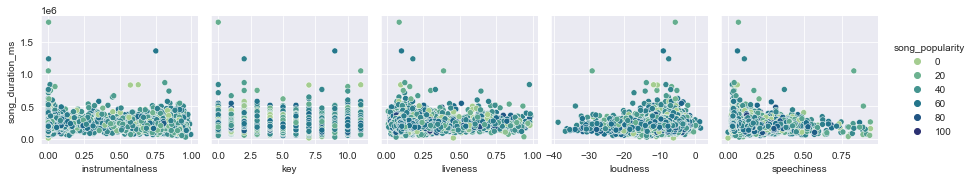

### song_duration_ms vs tempo, time_signature

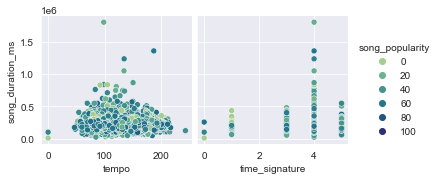

## speechiness

### speechiness vs acousticness, audio_mode, audio_valence, danceability, energy

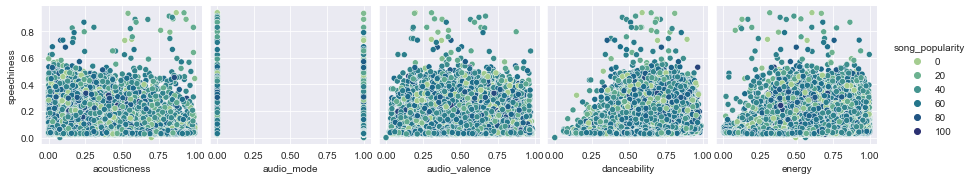

### speechiness vs instrumentalness, key, liveness, loudness, song_duration_ms

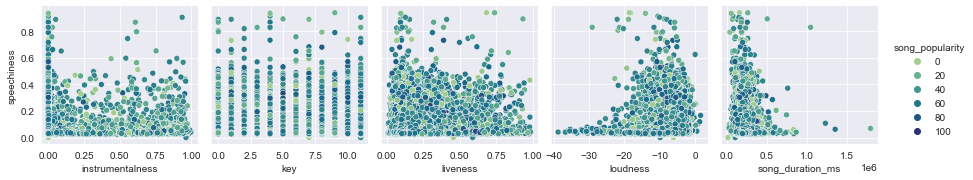

### speechiness vs tempo, time_signature

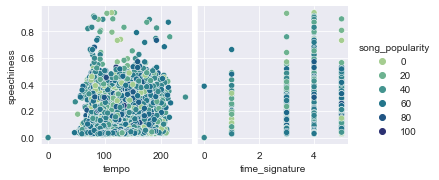

## tempo

### tempo vs acousticness, audio_mode, audio_valence, danceability, energy

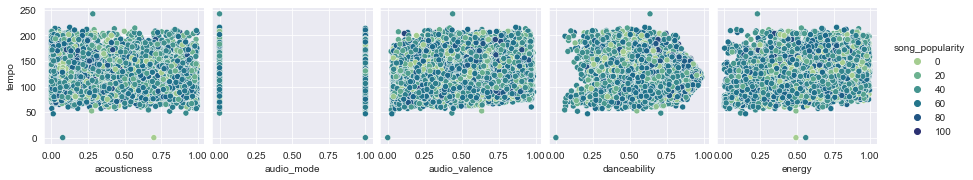

### tempo vs instrumentalness, key, liveness, loudness, song_duration_ms

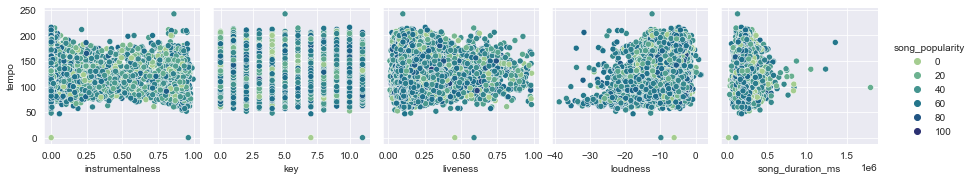

### tempo vs speechiness, time_signature

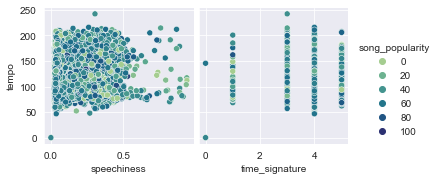

## time_signature

### time_signature vs acousticness, audio_mode, audio_valence, danceability, energy

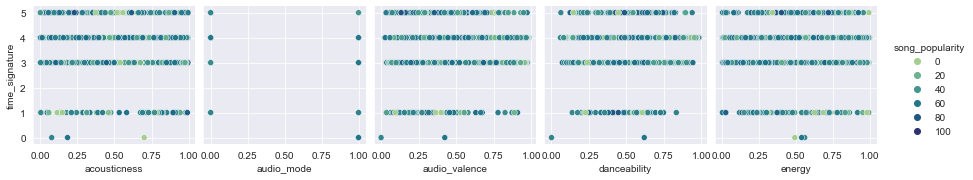

### time_signature vs instrumentalness, key, liveness, loudness, song_duration_ms

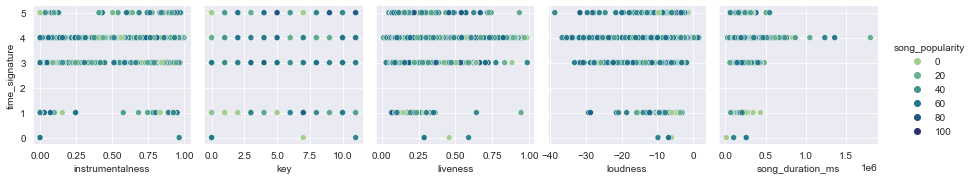

### time_signature vs speechiness, tempo

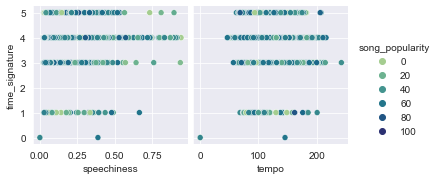

In [11]:
#visualizing and understanding the relationship between all features

#code adapted from: creanion, "Reduce number of plots in sns.pairplot()", 2021.[Online].
#Available:https://stackoverflow.com/questions/53717543/reduce-number-of-plots-in-sns-pairplot

sns.set_style('darkgrid')


hue = 'song_popularity'
features_per_line = 5
all_features = list(song_dataset3.columns.symmetric_difference([hue]))
display(Markdown(f"<h1><center>Relationship b/w all features</center></h1>"))

for feature in all_features:
    features_left = list(all_features)
    features_left.remove(feature)
    display(Markdown(f"## {feature}"))
    while features_left:
        line_feature = features_left[:features_per_line]
        del features_left[:features_per_line]
        feature_name = ", ".join(line_feature)
        display(Markdown(f"### {feature} vs {feature_name}"))
        sns.pairplot(song_dataset3,
                     x_vars=line_feature, 
                     y_vars=[feature],
                     hue=hue,
                     palette='crest', )
        plt.show()
        plt.close()

Some features such as audio_mode, time_signature and key have a linear relationship. <b><u>Note:</u></b> The above pair plot is scrollable and shows the relationship between all features.

### Further examining the multicollinearity between the features

In [12]:
#To compute pairwise correlation of columns
song_dataset3.corr()

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.007773     -0.031599   
song_duration_ms        -0.007773          1.000000     -0.113312   
acousticness            -0.031599         -0.113312      1.000000   
danceability             0.056569         -0.089354     -0.172040   
energy                  -0.016543          0.096380     -0.679235   
instrumentalness        -0.093012         -0.024850      0.179241   
key                     -0.003796         -0.006743     -0.000705   
liveness                -0.038503          0.020768     -0.085283   
loudness                 0.052036          0.027834     -0.569658   
audio_mode               0.008764         -0.028069      0.059487   
speechiness             -0.002000         -0.079444     -0.085404   
tempo                   -0.029500          0.013624     -0.144797   
time_signature           0.023298          0.004080     -0.151174   
audio_valence           -0.044001         -0.069768     -0.126892   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.056569 -0.016543         -0.093012 -0.003796   
song_duration_ms     -0.089354  0.096380         -0.024850 -0.006743   
acousticness         -0.172040 -0.679235          0.179241 -0.000705   
danceability          1.000000  0.053958         -0.125057  0.007389   
energy                0.053958  1.000000         -0.221719  0.014771   
instrumentalness     -0.125057 -0.221719          1.000000 -0.008537   
key                   0.007389  0.014771         -0.008537  1.000000   
liveness             -0.094363  0.175971         -0.039812 -0.003281   
loudness              0.173813  0.765676         -0.398893  0.008121   
audio_mode           -0.099114 -0.049011         -0.018868 -0.174948   
speechiness           0.201094  0.071974         -0.076653  0.028662   
tempo                -0.127240  0.182474         -0.041007 -0.005047   
time_signature        0.136284  0.143506         -0.068649 -0.008735   
audio_valence         0.350148  0.315030         -0.197779  0.023662   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.038503  0.052036    0.008764    -0.002000 -0.029500   
song_duration_ms  0.020768  0.027834   -0.028069    -0.079444  0.013624   
acousticness     -0.085283 -0.569658    0.059487    -0.085404 -0.144797   
danceability     -0.094363  0.173813   -0.099114     0.201094 -0.127240   
energy            0.175971  0.765676   -0.049011     0.071974  0.182474   
instrumentalness -0.039812 -0.398893   -0.018868    -0.076653 -0.041007   
key              -0.003281  0.008121   -0.174948     0.028662 -0.005047   
liveness          1.000000  0.111731   -0.001591     0.094123  0.025493   
loudness          0.111731  1.000000   -0.055802     0.078293  0.140216   
audio_mode       -0.001591 -0.055802    1.000000    -0.110571  0.022085   
speechiness       0.094123  0.078293   -0.110571     1.000000  0.056198   
tempo             0.025493  0.140216    0.022085     0.056198  1.000000   
time_signature    0.014788  0.112584   -0.020785     0.050760  0.008315   
audio_valence     0.016613  0.209788    0.002209     0.012895  0.051712   

                  time_signature  audio_valence  
song_popularity         0.023298      -0.044001  
song_duration_ms        0.004080      -0.069768  
acousticness           -0.151174      -0.126892  
danceability            0.136284       0.350148  
energy                  0.143506       0.315030  
instrumentalness       -0.068649      -0.197779  
key                    -0.008735       0.023662  
liveness                0.014788       0.016613  
loudness                0.112584       0.209788  
audio_mode             -0.020785       0.002209  
speechiness             0.050760       0.012895  
tempo                   0.008315       0.051712  
time_signature          1.000000       0.090682  
audio_valence           0.090682       1.000000

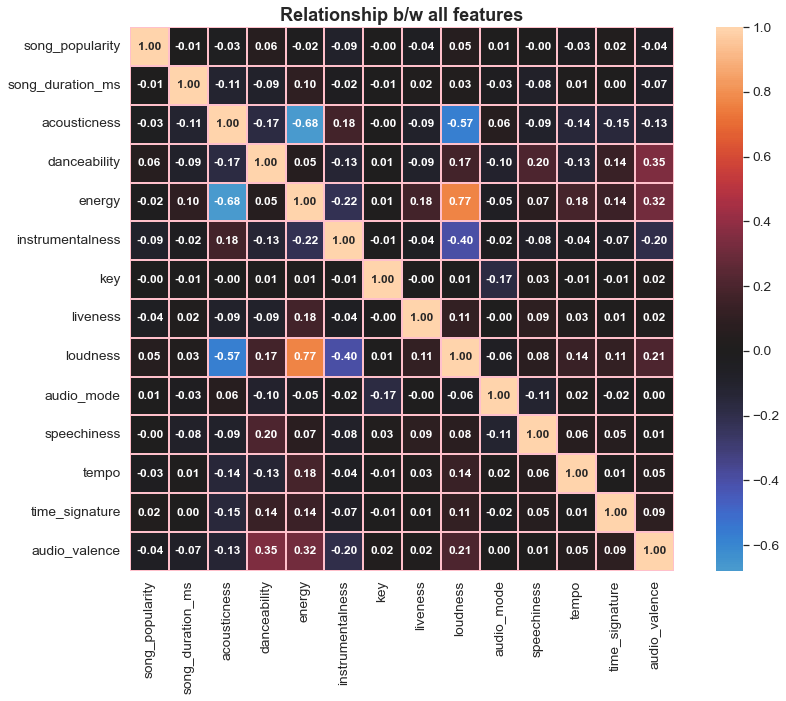

In [13]:
#Visualizing the correlation through a heatmap

#referenced from: Seaborn, "seaborn.heatmap", 2022.[Online]
#Available: https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=[15,10])
sns.set(font_scale = 1.25)
corr_heatmap = sns.heatmap(song_dataset3.corr(),
                           annot = True,
                           fmt = '.2f',
                           center = 0,
                           linewidth = 2,
                           linecolor='pink',
                           square = True,
                           annot_kws={
                               'fontsize':12, 
                               'fontweight':'bold'
                           });
plt.title("Relationship b/w all features", 
          weight = 'bold'
         ).set_fontsize('18')
plt.show()

</n><b>1) Energy has high multicollinearity with loudness, with a value of 0.77</b><br>
</n><b>2) Energy also has high multicollinearity with acousticness, with a value of -0.68</b><br>
</n><b>3) Loudness has high multicollinearity with acousticness, with a value of -0.57</b><br>
</n><b>4) Danceability has high multicollinearity with audio_valence, with a value of -0.57</b><br>
This is bad because it generates high variance of estimated coefficients. This would undermine the statistical significance of an independent variable and affect prediction performance in the ML model.

In [14]:
#Deleting the above mentioned features having high multicollinearity
song_dataset4 = song_dataset3.drop(['loudness', 'energy', 'instrumentalness', 'danceability'], axis = 1)

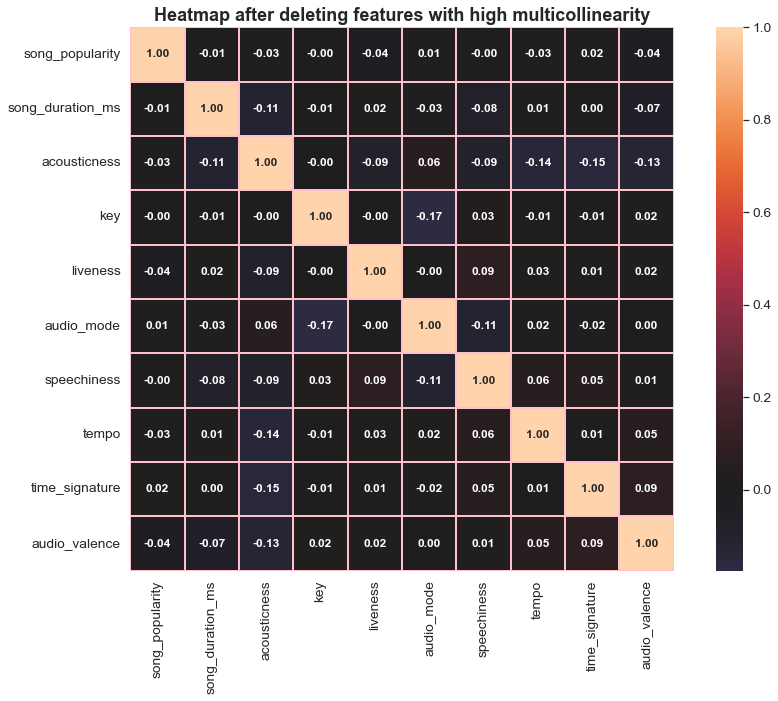

In [15]:
plt.figure(figsize=[15,10])
corr_heatmap = sns.heatmap(song_dataset4.corr(),
                           annot = True,
                           fmt = '.2f',
                           center = 0,
                           linewidth = 2,
                           linecolor='pink',
                           square = True,
                           annot_kws={
                               'fontsize':12, 
                               'fontweight':'bold'
                           });
plt.title('Heatmap after deleting features with high multicollinearity', 
          weight = 'bold').set_fontsize('18')

## Data Manipulation

In [16]:
#Splitting the dataframe into dependent and independent variables

#getting all Independent variables
X = song_dataset4.iloc[:, 1:].values

# #getting the Dependent variable vector which is in the 1st column
y = song_dataset4.iloc[:, 0].values

In [17]:
#Replacing 0 values with the mean of the values in their cloumn using Simple Imputer.

#referenced from: scikit-learn, "sklearn.impute.SimpleImputer", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(X[:, 0:])
X[:, 0:] = imputer.transform(X[:, 0:])

In [18]:
#Checking if the simple imputer has worked and if there are any features with the value 0
num_zeros = (X == 0).sum()
num_zeros

0

In [19]:
#Splitting the dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 0)  #Using random state to control and keep the
                                                                       #same shuffling process across all executions

## Using Decision Tree Regression for predicting song popularity

I chose Decision Tree  Regression for predicting the song poplularity as they adapt well to high dimensional dataset as in this case.

I have also not done feature scaling before using this model as, the predictions from Decision Trees are resulting from succesive splits of the data. Hence, feature scaling is not required in this case. 

I have also not performed dimentionality reduction as it does not have a significant impact on performance of the Decision Tree Regression Model. <b>However</b>, for model comparison purposes, I will perform <b>Principal Component Analysis(PCA)</b> decomposition for dimentionality reduction before using the other ML regressor models below for prediction.

In [20]:
#DTR after dropping features
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
dt_regressor.score(X_train, y_train)

0.9900555566496946

The model has achieved an accuracy of 99% on the training set

### Predicting the Test Set results

In [22]:
dt_y_pred = dt_regressor.predict(X_test)
np.set_printoptions(precision = 2)   #Displays the result upto 2 decimal places

#checking output of predicted and real vectors side by side
#referenced from: numpy, "numpy.concatenate", 2022.[Online]
#Available: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

print(np.concatenate((dt_y_pred.reshape(len(dt_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[67. 31.]
 [51. 39.]
 [15. 52.]
 ...
 [35. 31.]
 [23. 75.]
 [41. 63.]]


### Evaluating the Model performance

In [23]:
#referenced from: scikit-learn, "sklearn.metrics.r2_score", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Using R-Squared
dt_r2 = r2_score(y_test, dt_y_pred)
print("R-Square score:", dt_r2)

#Using Mean Absolute Error(MSE)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
print("MSE:", dt_mae)

#Using Root Mean Squared Error(RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))
print("RMSE:", dt_rmse)

R-Square score: -0.9366838814094047
MSE: 22.182112550245645
RMSE: 28.37125961322637


The negative R2 score indicates that the Decision Tree Regressor Model fits worse than a horizontal line. The Decision Tree seems to be overfitting as the accuracy on the Test Set has decreased as compared to the accuracy on the Training Set. I will compare this result with the dataset that still contains the features with high multicollinearity mentioned above; to see the differences in performance. 

### Without Removing Features having high mulitcollinearity

In [24]:
#Splitting the dataframe into dependent and independent variables

#getting all Independent variables
X = song_dataset3.iloc[:, 1:].values

# #getting the Dependent variable vector which is in the 1st column
y = song_dataset3.iloc[:, 0].values

In [25]:
#Replacing 0 values with the mean of the values in their cloumn using Simple Imputer.

#referenced from: scikit-learn, "sklearn.impute.SimpleImputer", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(X[:, 0:])
X[:, 0:] = imputer.transform(X[:, 0:])

In [26]:
#Checking if the simple imputer has worked and if there are any features with the value 0

num_zeros = (X == 0).sum()
num_zeros

0

In [27]:
#Splitting the dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 0)

In [28]:
#referenced from: scikit-learn, "sklearn.tree.DecisionTreeRegressor¶", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
dt_regressor.score(X_train, y_train)

0.9900555566496946

### Predicting the Test Set results

In [30]:
dt_y_pred = dt_regressor.predict(X_test)
np.set_printoptions(precision = 2)   #Displays the result upto 2 decimal places

#checking output of predicted and real vectors side by side

#referenced from: numpy, "numpy.concatenate", 2022.[Online]
#Available: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

print(np.concatenate((dt_y_pred.reshape(len(dt_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[45. 31.]
 [ 9. 39.]
 [64. 52.]
 ...
 [55. 31.]
 [ 6. 75.]
 [50. 63.]]


### Evaluating the Model performance

In [31]:
#referenced from: scikit-learn, "sklearn.metrics.r2_score", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Using R-Squared
dt_r2 = r2_score(y_test, dt_y_pred)
print("R-Square score:", dt_r2)

#Using Mean Absolute Error(MSE)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
print("MAE:", dt_mae)

#Using Root Mean Squared Error(RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))
print("RMSE:", dt_rmse)

R-Square score: -0.9486267329052323
MAE: 22.30582849486378
RMSE: 28.458602979054124


Surprisingly, in this scenario, training the <b>DTR</b> on the dataset containing the features with high multicollinearity <b>(song_dataset3)</b> performs slightly better than the dataset without those features <b>(song_dataset4)</b>. Hence, I will continue to use <b>song_dataset3</b> to evaluate and compare model performance between the other models below.

## Comparing results with Random Forests

In [32]:
#referenced from: scikit-learn, "sklearn.ensemble.RandomForestRegressor", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
rf_regressor.score(X_train, y_train)

0.8568991171845344

### Predicting the Test Set results

In [34]:
rf_y_pred = rf_regressor.predict(X_test)
np.set_printoptions(precision = 2)   #Displays the result upto 2 decimal places

#checking output of predicted and real vectors side by side

#referenced from: numpy, "numpy.concatenate", 2022.[Online]
#Available: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

print(np.concatenate((rf_y_pred.reshape(len(rf_y_pred), 1),
                      y_test.reshape(len(y_test), 1)), 
                      1))

[[41.78 31.  ]
 [49.83 39.  ]
 [45.46 52.  ]
 ...
 [43.04 31.  ]
 [54.33 75.  ]
 [52.13 63.  ]]


### Evaluating the Model performance

In [35]:
#Using R-Squared
rf_r2 = r2_score(y_test, rf_y_pred)
print("R2 score:", rf_r2)

#Using Mean Absolute Error(MSE)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print("MAE:", rf_mae)

#Using Root Mean Squared Error
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print("RMSE:", rf_rmse)

R2 score: 0.026853688367503903
MAE: 15.925093292073418
RMSE: 20.111215481295087


The Random Forest Regressor Model does beat the Decision Tree Regressor model with a slightly lower Mean Absolute Error and RMSE of 15.92 and 20.09, as compared to 22.30 and 28.61. From the R2 score, we can observe that the Random Forest regressor has a positive relation. Although it is almost negligibe, it is still slightly better than that of the Decision Tree Regressor. However, even the Random Forest seems to be overfitting the data.

## Using Multiple Linear Regression

<b>referenced from:</b><br> gung, "When conducting multiple regression, when should you center your predictor variables & when should you standardize them?", 2020.[Online]<br>
<b>Available:</b> https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

Multiple Linear Regression does not require feature scaling as the coefficients in the equation (Betas) will compensate for the values and put them all on the same scale.

In [36]:
#referenced from: scikit-learn, "sklearn.linear_model.LinearRegression", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn.linear_model import LinearRegression

mlr_regressor = LinearRegression()
mlr_regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
mlr_regressor.score(X_train, y_train)

0.019940927786261775

### Predicting the Test Set results

In [38]:
mlr_y_pred = mlr_regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((mlr_y_pred.reshape(len(mlr_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[48.59 31.  ]
 [44.17 39.  ]
 [48.73 52.  ]
 ...
 [45.39 31.  ]
 [51.96 75.  ]
 [50.56 63.  ]]


### Evaluating the Model performance

In [39]:
from sklearn.metrics import r2_score
mlr_r2 = r2_score(y_test, mlr_y_pred)
print("R2 Score", mlr_r2)

#Using Mean Absolute Error(MSE)
mlr_mae = mean_absolute_error(y_test, mlr_y_pred)
print("MAE:", mlr_mae)

#Using Root Mean Squared Error
mlr_rmse = np.sqrt(mean_squared_error(y_test,
                                      mlr_y_pred))
print("RMSE:", mlr_rmse)

R2 Score 0.018097580197231733
MAE: 16.101693299511012
RMSE: 20.201490516080934


The Multiple Linear Regression Model performs slightly worse than the Random Forest Regressor model, but it does however perform slightly better thant the Decision Tree Regressor model. 

## Using Polynomial Regression

As explained above in Multiple linear regression, even polynomial regression does not require feature scaling.
Polynomial Regression being a non-linear model, could have a better chance of predicting data and to also eliminate overfitting. I will verify this through the implementaion below.

In [40]:
#referenced from: scikit-learn, "sklearn.preprocessing.PolynomialFeatures", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X_train)
poly_regressor.fit(X_train, y_train)

lin_regressor = LinearRegression()
lin_regressor.fit(X_poly, y_train)

LinearRegression()

In [41]:
poly_y_pred = lin_regressor.predict(poly_regressor.fit_transform(X_test))
np.set_printoptions(precision = 2)
print(np.concatenate((poly_y_pred.reshape(len(poly_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[48.25 31.  ]
 [43.25 39.  ]
 [47.78 52.  ]
 ...
 [37.78 31.  ]
 [53.99 75.  ]
 [51.26 63.  ]]


In [42]:
from sklearn.metrics import r2_score
poly_r2 = r2_score(y_test, poly_y_pred)
print("R2 Score", mlr_r2)

#Using Mean Absolute Error(MSE)
poly_mae = mean_absolute_error(y_test, poly_y_pred)
print("MAE:", poly_mae)

#Using Root Mean Squared Error
poly_rmse = np.sqrt(mean_squared_error(y_test,
                                      poly_y_pred))
print("RMSE:", poly_rmse)

R2 Score 0.018097580197231733
MAE: 15.776716396240044
RMSE: 19.937849193561966


As predicted, the Polynomial Regressor has the best score out of the compared models.

## Feature Scaling (Standardization - scaling b/w values -3 and +3) 

In [43]:
#reshaping y to a 2D array for Feature Scaling
y = song_dataset3.iloc[:, 0:1].values

#resplitting the data after changing the dimension of y
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30, random_state = 0)

In [44]:
#Feature scaling is done after splitting dataset into Training Set and Test set,
#so as to prevent any information leakage on the Test set. 

#referenced from: Bhandari A, "Feature Scaling for Machine Learning: 
#Understanding the Difference Between Normalization vs. Standardization", 2022.[Online]
#Available: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
sc_y_train = sc_y.fit_transform(y_train)
sc_y_test = sc_y.transform(y_test)


In [45]:
display(Markdown(f"<h3>Standardization on Features Training Set</h3>"))
print(sc_X_train)

<h3>Standardization on Features Training Set</h3>

[[-0.08  2.26 -0.43 ... -0.6   0.15 -1.4 ]
 [ 3.92 -0.9   0.78 ... -0.04  0.15 -1.9 ]
 [-0.5  -0.89 -0.15 ...  1.61  0.15 -1.12]
 ...
 [-0.54  2.02  0.55 ... -0.74  0.15  1.73]
 [-0.15  1.78 -0.96 ... -1.58  0.15 -0.46]
 [-0.41 -0.31  0.39 ...  0.08  0.15  1.06]]


In [46]:
display(Markdown(f"<h3>Standardization on Features Test Set</h3>"))
print(sc_X_test)

<h3>Standardization on Features Test Set</h3>

[[-0.08 -0.87 -0.58 ...  0.72  0.15 -0.18]
 [ 1.16  1.32 -0.45 ... -0.86  0.15 -0.34]
 [ 1.51 -0.6  -1.92 ...  0.4   0.15 -1.56]
 ...
 [ 0.87 -0.89  0.79 ... -0.23  0.15 -0.4 ]
 [ 1.39  0.18 -0.5  ... -0.32  0.15 -1.61]
 [ 0.15 -0.9   0.02 ...  0.72  0.15 -1.32]]


In [47]:
display(Markdown(f"<h3>Standardization on Dependent Variable Training Set</h3>"))
print(sc_y_train)

<h3>Standardization on Dependent Variable Training Set</h3>

[[-1.07]
 [ 0.31]
 [-1.31]
 ...
 [-1.31]
 [ 1.29]
 [ 0.11]]


In [48]:
display(Markdown(f"<h3>Standardization on Dependent Variable Test Set</h3>"))
print(sc_y_test)

<h3>Standardization on Dependent Variable Test Set</h3>

[[-0.87]
 [-0.48]
 [ 0.16]
 ...
 [-0.87]
 [ 1.29]
 [ 0.7 ]]


## Feature Extraction

## Dimensionality Reduction Using Principal Component Analysis(PCA)

In [49]:
#Using Principal Component Analysis(PCA)
from sklearn.decomposition import PCA
oneD_y_train = sc_y_train.ravel()
oneD_y_train = oneD_y_train.astype('int')

pca = PCA(n_components = 9)
sc_X_train = pca.fit_transform(sc_X_train)
sc_X_test = pca.transform(sc_X_test)

## Support Vector Regression(SVR) Using PCA

In [50]:
#referenced from: scikit-learn, "sklearn.svm.SVR", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

from sklearn.svm import SVR

pca_svr_regressor = SVR(kernel = 'rbf')
pca_svr_regressor.fit(sc_X_train, oneD_y_train)

SVR()

### Predicting the Test Set results

In [51]:
#Reverting back to the original scale of values 

#referenced from: Malathi,
#"How to inverse transform the predicted values in a multivariate time series LSTM Model", 2019.[Online]
#Available: https://stackoverflow.com/questions/57216718/how-to-inverse-transform-the-predicted-values-in-a-multivariate-time-series-lstm

inverse_y_pred = sc_y.inverse_transform(pca_svr_regressor.predict(sc_X_test).reshape(-1,1))
inverse_y_test = sc_y.inverse_transform(sc_y_test)

np.set_printoptions(precision = 2)

print(np.concatenate((inverse_y_pred.reshape(len(inverse_y_pred), 1),
                      inverse_y_test.reshape(len(inverse_y_test), 1)),
                      1))

[[49.83 31.  ]
 [48.2  39.  ]
 [48.81 52.  ]
 ...
 [47.97 31.  ]
 [48.84 75.  ]
 [47.22 63.  ]]


### Evaluating the Model performance

In [52]:
from sklearn.metrics import r2_score
pca_svr_r2 = r2_score(inverse_y_test, inverse_y_pred)
print("R2 Score", pca_svr_r2)

#Using Mean Absolute Error(MSE)
pca_svr_mae = mean_absolute_error(inverse_y_test, inverse_y_pred)
print("MAE:", pca_svr_mae)

#Using Root Mean Squared Error
pca_svr_rmse = np.sqrt(mean_squared_error(inverse_y_test, inverse_y_pred))
print("RMSE:", pca_svr_rmse)


R2 Score 0.019535434616167913
MAE: 16.096899984158128
RMSE: 20.186694013227243


## Dimentionality reduction using Linear Discriminant Analysis(LDA)

In [53]:
#Using Linear Discriminant Analysis(LDA)

#referenced from: scikit-learn, "sklearn.discriminant_analysis.LinearDiscriminantAnalysis", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

oneD_y_train = sc_y_train.ravel()                 #To view sc_y_train as one dimensional
oneD_y_train = oneD_y_train.astype('int')         #To view the object as an integer type

lda = LDA(n_components = 4)
sc_X_train = lda.fit_transform(sc_X_train,
                               oneD_y_train)
sc_X_test = lda.transform(sc_X_test)

## SVR Using LDA

In [54]:
lda_svr_regressor = SVR(kernel = 'rbf')
lda_svr_regressor.fit(sc_X_train, oneD_y_train)

SVR()

In [55]:
#Reverting back to the original scale of values 
inverse_y_pred = sc_y.inverse_transform(lda_svr_regressor.predict(sc_X_test).reshape(-1,1))
inverse_y_test = sc_y.inverse_transform(sc_y_test)

np.set_printoptions(precision = 2)

print(np.concatenate((inverse_y_pred.reshape(len(inverse_y_pred), 1),
                      inverse_y_test.reshape(len(inverse_y_test), 1)),
                      1))

[[48.91 31.  ]
 [46.95 39.  ]
 [47.01 52.  ]
 ...
 [46.83 31.  ]
 [48.88 75.  ]
 [46.8  63.  ]]


In [56]:
from sklearn.metrics import r2_score
lda_svr_r2 = r2_score(inverse_y_test, inverse_y_pred)
print("R2 Score", lda_svr_r2)

#Using Mean Absolute Error(MSE)
lda_svr_mae = mean_absolute_error(inverse_y_test, inverse_y_pred)
print("MAE:", lda_svr_mae)

#Using Root Mean Squared Error
lda_svr_rmse = np.sqrt(mean_squared_error(inverse_y_test, inverse_y_pred))
print("RMSE:", lda_svr_rmse)

R2 Score 0.01461740521028343
MAE: 16.154389683805835
RMSE: 20.23725910934805


In this case, PCA decomposition has performed slightly better than LDA decomposition. It is however important to note that PCA is keeping 9 features whereas LDA is only keeping 4 features. If PCA also keeps only 4 features, LDA performs slightly better than PCA. 

### Using XGBoost

### Applying XGBoost on the Training Set

<b><u>Note:</u></b> To use xgboost, it needs to be installed on the system. <br>
It can be installed through the terminal (Mac) or cmd (Windows) by running the code:
<b>pip install xgboost</b>

In [57]:
#referenced from: nikki2398, "XGBoost for Regression", 2022.[Online]
#Available: https://www.geeksforgeeks.org/xgboost-for-regression/

from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
xgb_y_pred = xgb_regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((xgb_y_pred.reshape(len(xgb_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[46.41 31.  ]
 [47.51 39.  ]
 [42.05 52.  ]
 ...
 [34.43 31.  ]
 [53.02 75.  ]
 [54.91 63.  ]]


In [59]:
from sklearn.metrics import r2_score
xgb_r2 = r2_score(y_test, xgb_y_pred)
print("R2 Score", xgb_r2)

#Using Mean Absolute Error(MSE)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
print("MAE:", xgb_mae)

#Using Root Mean Squared Error
xgb_rmse = np.sqrt(mean_squared_error(y_test,
                                      xgb_y_pred))
print("RMSE:", xgb_rmse)

R2 Score -0.036586985445436815
MAE: 16.392026930262116
RMSE: 20.75640445810125


Even XGBoost was not able to beat the score of Polynomial Regression

## Improving Model Performance

I have chosen the <b>Polynomial Regession Model</b> for improving model performance as it has the best results out of all the models compared thus far. 

### Redoing Polynomial Regression with boosting

In [60]:
#referenced from: scikit-learn, "sklearn.preprocessing.PolynomialFeatures", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X_train)
poly_regressor.fit(X_train, y_train)

lin_regressor = LinearRegression()
lin_regressor.fit(X_poly, y_train)

LinearRegression()

In [61]:
poly_y_pred = lin_regressor.predict(poly_regressor.fit_transform(X_test))
np.set_printoptions(precision = 2)
print(np.concatenate((poly_y_pred.reshape(len(poly_y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                      1))

[[48.25 31.  ]
 [43.25 39.  ]
 [47.78 52.  ]
 ...
 [37.78 31.  ]
 [53.99 75.  ]
 [51.26 63.  ]]


In [62]:
from sklearn.metrics import r2_score
poly_r2 = r2_score(y_test, poly_y_pred)
print("R2 Score", mlr_r2)

#Using Mean Absolute Error(MSE)
poly_mae = mean_absolute_error(y_test, poly_y_pred)
print("MAE:", poly_mae)

#Using Root Mean Squared Error
poly_rmse = np.sqrt(mean_squared_error(y_test,
                                      poly_y_pred))
print("RMSE:", poly_rmse)

R2 Score 0.018097580197231733
MAE: 15.776716396240044
RMSE: 19.937849193561966


### Performing k-fold cross validation

In [63]:
#k-fold cross validate referenced from: scikit-learn, "sklearn.model_selection.cross_validate¶", 2022.[Online]
#Available:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

#Scoring Metrics referenced from:
#scikit-learn, "3.3. Metrics and scoring: quantifying the quality of predictions", 2022.[Online]
#Available: https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import cross_validate
#Using scoring metrics of neg_mean_absolute_error (nmea)
#and neg_root_mean_squared_error (nrmse)
scores = cross_validate(lin_regressor,
                             X_train,
                             y_train,
                             scoring = ['neg_mean_absolute_error', 
                                        'neg_root_mean_squared_error'], cv = 10)

In [64]:
scores = pd.DataFrame(scores)
scores

fit_time  score_time  test_neg_mean_absolute_error  \
0  0.007429    0.000940                    -16.296774   
1  0.005616    0.000710                    -16.249389   
2  0.005079    0.000790                    -16.118756   
3  0.005114    0.000999                    -15.979954   
4  0.005956    0.000744                    -16.256103   
5  0.003489    0.000657                    -15.997447   
6  0.003439    0.000986                    -15.945157   
7  0.004294    0.001000                    -16.023213   
8  0.003459    0.000756                    -15.989090   
9  0.002980    0.000713                    -15.708469   

   test_neg_root_mean_squared_error  
0                        -20.264496  
1                        -20.254682  
2                        -20.506037  
3                        -20.198333  
4                        -20.474134  
5                        -20.366585  
6                        -20.052752  
7                        -20.090842  
8                        -20.018755  
9                        -19.711055

It can be observed that the <b>10th fold</b> had the best score for <b>mea</b> and <b>rmse</b> , and that it performed slightly better than our predicted score.

In [65]:
-scores.mean()

fit_time                            -0.004685
score_time                          -0.000830
test_neg_mean_absolute_error        16.056435
test_neg_root_mean_squared_error    20.193767
dtype: float64

However, our model prediction performed better than the average score of the 10 different folds.

### Applying Grid Search to find best model and parameters

In [66]:
################ This code has been commented out because it is very computationally intensive #######################


# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# #referenced from: Wickramarachchi A., "Machine Learning: Model Selection and Hyperparameter Tuning", 2020.[Online]
# #Available: https://towardsdatascience.com/machine-learning-model-selection-and-hyperparameter-tuning-736158357dc4

# parameters = [{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9],
#                'poly__interaction_only':[False, True],
#                'poly__include_bias': [True, False],
#                'poly__order': ['C', 'F']  
#               }]

# pipeline = Pipeline(steps=[('poly', poly_regressor), ('lin_reg', lin_regressor)])

# grid_search = GridSearchCV(pipeline, 
#                            parameters,
#                            cv=3,
#                            scoring='neg_mean_absolute_error')

# grid_search.fit(X_train, y_train)
# best_score = grid_search.best_score_                           
# best_parameters = grid_search.best_params_
# print("Best Score:", best_score)                          
# print("Best Parameters:", best_parameters)

Best Parameters that were identified by GridSearchCV were: <br>
degree = 2, include_bias = True, interaction_only = False, poly_order = C. Which are the default values.

## Summary of scores between all models (Using PrettyTable)

<b><u>Note:</u></b> To use PrettyTable, it needs to be installed on the system. <br>
It can be installed through the terminal (Mac) or cmd (Windows) by running the code:
<b>pip install prettytable</b>

In [67]:
#referenced from: pypi.org, "prettytable 3.5.0", 2022.[Online]
#Available: https://pypi.org/project/prettytable/

from prettytable import PrettyTable
score_summary = PrettyTable()

#Creating the table header
score_summary.field_names = ["ML Regression Models", "R2 Score", "MAE", "RMSE"]

#adding the models with their scores
score_summary.add_rows(
    [
        ["Polynomial Regressor", poly_r2, poly_mae, poly_rmse],
        ["Random Forest Regressor", rf_r2, rf_mae, rf_rmse],
        ["SVR using PCA", pca_svr_r2, pca_svr_mae, pca_svr_rmse],
        ["Multiple Linear Regressor", mlr_r2, mlr_mae, mlr_rmse],
        ["SVR using LDA", lda_svr_r2, lda_svr_mae, lda_svr_rmse],
        ["XGBoost", xgb_r2, xgb_mae, xgb_rmse],
        ["Decision Tree Regressor", dt_r2, dt_mae, dt_rmse]
    ]
)

# #printing the table
print(score_summary)

+---------------------------+-----------------------+--------------------+--------------------+
|    ML Regression Models   |        R2 Score       |        MAE         |        RMSE        |
+---------------------------+-----------------------+--------------------+--------------------+
|    Polynomial Regressor   |  0.04355915187503523  | 15.776716396240044 | 19.937849193561966 |
|  Random Forest Regressor  |  0.026853688367503903 | 15.925093292073418 | 20.111215481295087 |
|       SVR using PCA       |  0.019535434616167913 | 16.096899984158128 | 20.186694013227243 |
| Multiple Linear Regressor |  0.018097580197231733 | 16.101693299511012 | 20.201490516080934 |
|       SVR using LDA       |  0.01461740521028343  | 16.154389683805835 | 20.23725910934805  |
|          XGBoost          | -0.036586985445436815 | 16.392026930262116 | 20.75640445810125  |
|  Decision Tree Regressor  |  -0.9486267329052323  | 22.30582849486378  | 28.458602979054124 |
+---------------------------+-----------

## Conclusion

The overall performance of the regression models on the chosen dataset was poor. This can be improved by increasing the quality and quantity of new data. Improving the accuracy of the models to at least achieve 60% accuracy can greatly help the efforts of songwriters. It would help to create content that most users are attracted to. Displaying the independent features that affect the song popularity can also help listeners to choose their songs easily. For example, if the listener wanted to listen to calming and peacful music, they can filter and choose the most popular songs that have lower loudness and daceability.

The models and steps completed in this project are easily transferable to any other domain that uses regression models, such as predicting housing prices in a city or for predicting the popularity of a product being sold by a company. The other domians would have to do very minimal data preprocessing such as encoding categorical features.


The above implementation could be reproduced in the <b>R</b> programming language. The scores could also be further improved by using models such as <b>Deep Learning, Auto XGBoost, optuna and catboost.</b> A useful tool that could have been implemented was the GridSearchCv Progress Bar by pac tools. GridSearchCV is a very computationally intensive and time consuming technique (it took over 48 hours). Although the "verbose" hyperparameter is a way to measure the progress, it can get very messy especially with the amount of data that it would have to iterate, which is why I have not used it in my implementation above.

<b> GridSearchCv Progress Bar referenced from: </b>la Tour T. D., "Grid-search and cross-validation", 2017.[Online]
Available: https://pactools.github.io/auto_examples/plot_grid_search.html?highlight=gridsearchcvprogressbar